In [1]:
from fastai.text.all import *
from fastai.vision.all import *
import librosa
import numpy as np
import pandas as pd 
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [2]:
# Function that converts audio files into spectrograms
def create_melspectrogram(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename = 'Medical Speech, Transcription, and Intent/spectrograms/' + name + '.jpg'
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [4]:
Data_dir_train=np.array(glob("Medical Speech, Transcription, and Intent/recordings/train/*"))
Data_dir_test=np.array(glob("Medical Speech, Transcription, and Intent/recordings/test/*"))
Data_dir_val=np.array(glob("Medical Speech, Transcription, and Intent/recordings/validate/*"))

for file in tqdm(Data_dir_train):
    filename,name = file,file.split('/')[-1].split('.')[0]
    create_melspectrogram(filename,name)
for file in tqdm(Data_dir_test):
    filename,name = file,file.split('/')[-1].split('.')[0]
    create_melspectrogram(filename,name)
for file in tqdm(Data_dir_val):
    filename,name = file,file.split('/')[-1].split('.')[0]
    create_melspectrogram(filename,name)

  2%|▏         | 112/5895 [00:13<12:51,  7.49it/s]/Users/shanmukhasreenivas/Library/Python/3.9/lib/python/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
  4%|▎         | 210/5895 [00:26<13:34,  6.98it/s]/Users/shanmukhasreenivas/Library/Python/3.9/lib/python/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
  4%|▎         | 218/5895 [00:27<16:12,  5.84it/s]/Users/shanmukhasreenivas/Library/Python/3.9/lib/python/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce e

In [3]:
overviewAudio = pd.read_csv('Medical Speech, Transcription, and Intent/overview-of-recordings.csv', usecols=['file_name', 'prompt'])
overviewAudio['spec_name'] = overviewAudio['file_name'].str.split('.wav').str[0]
overviewAudio = overviewAudio[['spec_name', 'prompt']]

### 2. Prepare your Baseline Model

Here you can have your code to either train (e.g., if you are building it from scratch) or load (e.g., in the case that you are loading a pre-trained model) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [23]:
path = 'Medical Speech, Transcription, and Intent'
np.random.seed(7)
data = ImageDataBunch.from_df(path,df=overviewAudio, folder="spectrograms", valid_pct=0.2, suffix='.jpg',
        ds_tfms=get_transforms(), size=299, num_workers=0).normalize(imagenet_stats)
learn = create_cnn(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(10)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 90175880.76it/s]


epoch,train_loss,valid_loss,accuracy
1,3.777970,3.425388,0.055556
2,3.603327,3.411487,0.048799
3,3.430181,3.403584,0.070571
4,3.310664,3.244292,0.081832
5,3.231933,3.221661,0.069069
6,3.164164,3.207837,0.081832
7,3.098585,3.194690,0.072072
8,3.049064,3.181300,0.081081
9,2.999531,3.179745,0.082583
10,2.969005,3.176695,0.082583


In [25]:
learn.unfreeze()
learn.fit_one_cycle(50)

epoch,train_loss,valid_loss,accuracy
1,2.957112,3.170077,0.087087
2,2.918982,3.162379,0.091592
3,2.888262,3.168746,0.099850
4,2.841810,3.190507,0.092342
5,2.814808,3.195862,0.102102
6,2.743364,3.225248,0.102853
7,2.679266,3.388287,0.096847
8,2.629377,3.154596,0.126126
9,2.580616,3.271382,0.129880
10,2.507367,3.119758,0.163664


### 3. Baseline Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07


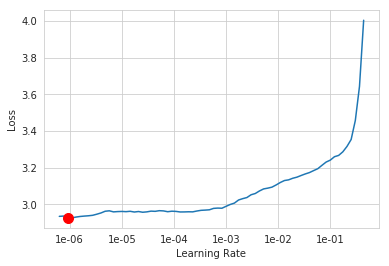

In [ ]:
learn.lr_find()
learn.recorder.plot()

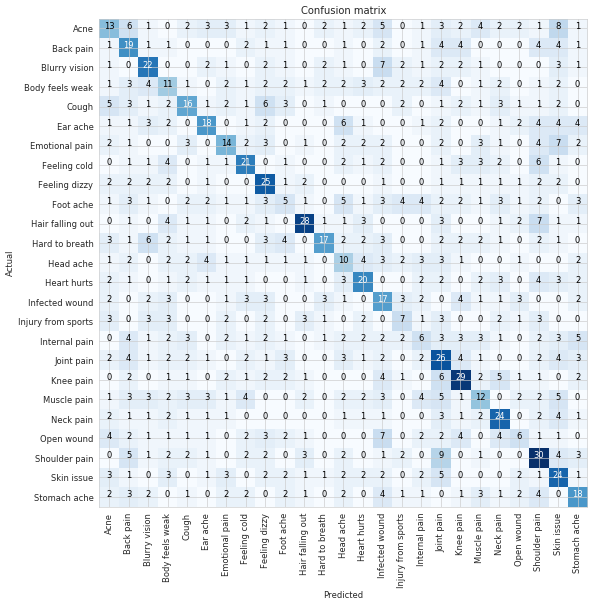

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)